In [3]:
import sys
import os
sys.path.append(os.path.abspath('./voidFinderProject'))
from voidFinderProject import radius_analisis as ra

In [4]:
# =============================================================================
# IMPORTS
# =============================================================================
import pathlib
from voidfindertk import io
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [5]:
# =============================================================================
# PATHS
# =============================================================================
dataset_path = pathlib.Path("/home/jorgefederico/updates/vftk_1109/voidFinderProject/datasets")
woking_dir= pathlib.Path("/home/jorgefederico/updates/vftk_1109/voidFinderProject/run_popcorn")

# Model paths
d_09_dir = "tmpw990bohs2024-08-09T18:06:26.180577+00:00"
d_08_dir = "tmpovse6ej82024-08-21T16:12:49.132243+00:00"
d_07_dir = "tmplxhn4wcw2024-08-22T01:08:51.465883+00:00"
paths = [
    woking_dir / d_09_dir,
    woking_dir / d_08_dir,
    woking_dir / d_07_dir
]


In [6]:
path = pathlib.Path('/home/jorgefederico/updates/vftk_1109/voidFinderProject')
dens = [-0.9,-0.8,-0.7]
models = [
    path / f"svf_popcorn_model_2{dens[0]}.pkl",
    path / f"svf_popcorn_model_2{dens[1]}.pkl",
    path / f"svf_popcorn_model_2{dens[2]}.pkl",
]

In [7]:
# Load Model
model09 = joblib.load(models[0])
model08 = joblib.load(models[1])
model07 = joblib.load(models[2])
# Load Dataframes
df9 = pd.read_csv(woking_dir / d_09_dir / "sphfile.dat",names=["idx","r","x","y","z","delta"], delim_whitespace=True)
df8 = pd.read_csv(woking_dir / d_08_dir / "sphfile.dat",names=["idx","r","x","y","z","delta"], delim_whitespace=True)
df7 = pd.read_csv(woking_dir / d_07_dir / "sphfile.dat",names=["idx","r","x","y","z","delta"], delim_whitespace=True)
# Load Box
box = io.read_table(
    dataset_path/"halos_ascii_1000_1024_npmin_10_z0.51.dat",
    names=["m","x", "y", "z", "vx", "vy", "vz"])


In [8]:
ef_rad_08 = model08.effective_radius(delta=-0.8,n_neighbors=200)
ef_rad_07 = model07.effective_radius(delta=-0.7,n_neighbors=400)
ef_rad_09 = model09.effective_radius(delta=-0.9,n_neighbors=100)

/home/jorgefederico/updates/vftk_1109/voidFinderProject/voidfindertk/core/vsf.py:201: RuntimeWarning: All values under critical Density for center 8377
  warnings.warn(
/home/jorgefederico/updates/vftk_1109/voidFinderProject/voidfindertk/core/vsf.py:201: RuntimeWarning: All values under critical Density for center 25705
  warnings.warn(
/home/jorgefederico/updates/vftk_1109/voidFinderProject/voidfindertk/core/vsf.py:201: RuntimeWarning: All values under critical Density for center 37114
  warnings.warn(
/home/jorgefederico/updates/vftk_1109/voidFinderProject/voidfindertk/core/vsf.py:201: RuntimeWarning: All values under critical Density for center 5784
  warnings.warn(
/home/jorgefederico/updates/vftk_1109/voidFinderProject/voidfindertk/core/vsf.py:201: RuntimeWarning: All values under critical Density for center 27315
  warnings.warn(
/home/jorgefederico/updates/vftk_1109/voidFinderProject/voidfindertk/core/vsf.py:201: RuntimeWarning: All values under critical Density for center 39891

In [9]:
model_analisis=[
    (model09,df9,ef_rad_09,-0.9),
    (model08,df8,ef_rad_08,-0.8),
    (model07,df7,ef_rad_07,-0.7),
]


# Analisis

In [151]:
# Select model analisis
ma = model_analisis[2]
# indice errores
e = np.where(ma[2].errors ==2)[0]
## indice no errores
ne = np.where(ma[2].errors ==0)[0]

# radios validos con discrepancias
# radios popcorn
r = np.array(ma[1]["r"])[ne] #df9 dataframe con los datos de svf popcorn
# radios calculados por effective_rad
r9 = ma[2].radius[ne]

# indices de radios discrepantes
disc = np.where(np.abs(r-r9)>5)[0]

# contraste de densidad integrada
delta = (1+ma[3])*(len(box)/(box.size()**3)) #NO SE TOCA

In [109]:
len(e)

8

In [145]:
# =============================================================================
# DISC INDEX
# =============================================================================
disc_indx = 4 #<--- Change the index of the discrepancy case
# =============================================================================
# ERROR INDEX
# =============================================================================
eindx = 2

Text(0.5, 0, '$radius$')

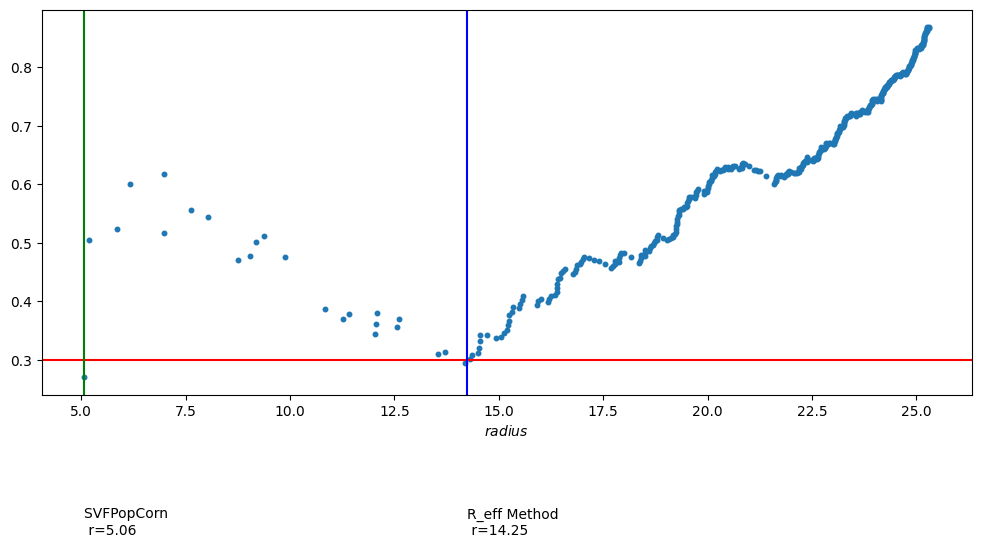

In [136]:


dots = 400

# exploro mapa de densidad
dens_ = ma[2].densities[ne]
dens_map = dens_[disc[disc_indx]]
n = np.arange(1,len(dens_map)+1)
# get radius from density map
rad = (n/((4/3)*np.pi*dens_map))**(1/3)
######### PLOT
fix,ax = plt.subplots(1,1,figsize=(12,5))

########################
ax.scatter(rad[:dots],dens_map[:dots]/(len(box)/(box.size()**3)), s=10.5)
ax.axhline(y=delta/(len(box)/(box.size()**3)),color="r")
ax.axvline(x=r[disc[disc_indx]],c="g")
ax.axvline(x=r9[disc[disc_indx]],c="b")
ax.text(r[disc[disc_indx]],delta+0.2*delta,f"SVFPopCorn \n r={r[disc[disc_indx]]:.2f}")
ax.text(r9[disc[disc_indx]],delta-0.5*delta,f"R_eff Method \n r={r9[disc[disc_indx]]:.2f}")
ax.set_xlabel(r"$radius$")


Text(0.5, 0, '$R$')

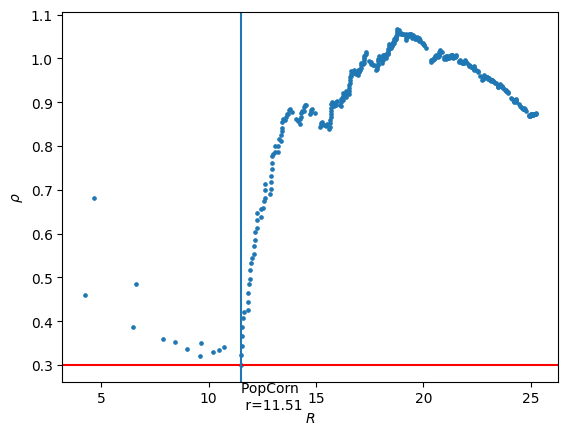

In [152]:
# exploro mapa de densidad
dens_ = ma[2].densities[e]
dens_map = np.round(dens_[eindx],10)
n = np.arange(1,len(dens_map)+1)
rad = (n/((4/3)*np.pi*dens_map))**(1/3)

####
dots = 400
fig,ax = plt.subplots(1,1)
ax.scatter(rad[:dots],dens_map[:dots]/(len(box)/(box.size()**3)),s=5.5)
ax.axhline(y=delta/(len(box)/(box.size()**3)),color="r")
ax.axvline(x=ma[1]['r'][e[eindx]])
ax.text(ma[1]['r'][e[eindx]],0.2,f"PopCorn \n r={ma[1]['r'][e[eindx]]:.2f}")
ax.set_ylabel(r"$\rho$")
ax.set_xlabel(r"$R$")
##
# ax.set_ylim([0, 0.5])


In [154]:
# =============================================================================
# GENERATE DATAFRAME
# =============================================================================
# e me da el indice de los errores. Ahora busco sus coordenadas con el dataframe:
df_e = ma[1].loc[ma[1].index.intersection(e)]
# La idea es que uno puede estimar el valor de n considerando los valores de densidad usando la ecuacion anterior:
df_e["density"] = ((np.array(df_e['delta']))+1)*(len(box)/(box.size()**3))
# Hacemos entonces el calculo de arriba
n_part = np.round(df_e['density']*(4*np.pi/3)*(df_e['r']**3),2)
# Con esto llegaria a la conclusion de que no deberian haber particulas en estos voids.
df_e["n_tracers"] = n_part
df_e.reset_index(inplace=True)

# Dataframe NE
# Veamos los no errores entonces:
df_ne = ma[1].loc[ma[1].index.intersection(ne)]
# Calculemos las densidades:
df_ne["density"] = ((np.array(df_ne['delta']))+1)*(len(box)/(box.size()**3))
# Finalmente calculamos el numero de particulas:
n_part_ne = np.round(df_ne['density']*(4*np.pi/3)*(df_ne['r']**3),2)
df_ne["n_tracers"] = n_part_ne
df_ne.reset_index(inplace=True)

In [156]:

# df_ne.loc[disc[disc_indx],:]
dfne = df_ne.loc[disc,:]
dfne.reset_index(inplace=True)
dfne#all



,level_0,index,idx,r,x,y,z,delta,density,n_tracers
0,3125,3126,3127,5.546319,495.721191,234.501328,42.028957,-0.793767,0.001399,1.0
1,12055,12059,12060,11.797900,87.892662,202.507874,155.671753,-0.700024,0.002035,14.0
2,17224,17229,17230,5.429498,709.283081,81.800682,215.162537,-0.780166,0.001492,1.0
3,20719,20724,20725,5.220092,632.698303,702.600891,259.587097,-0.752635,0.001678,1.0
4,21211,21216,21217,5.062163,86.546982,167.918747,265.727661,-0.728753,0.001840,1.0
5,27916,27924,27925,5.638583,300.917969,774.056946,349.562592,-0.803726,0.001332,1.0
6,34387,34397,34398,5.151717,257.709808,681.955688,429.829437,-0.742654,0.001746,1.0
7,34403,34413,34414,5.087667,476.492157,782.650635,430.478485,-0.732812,0.001813,1.0
8,43843,43855,43856,5.085003,988.628540,320.614349,554.552795,-0.732392,0.001816,1.0
9,44701,44713,44714,6.831906,430.322205,11.572968,564.705078,-0.779313,0.001497,2.0


In [157]:
# HACER BUSQUEDA
# df_e.loc[eindx,:]
df_e.loc[:,:] #all

,index,idx,r,x,y,z,delta,density,n_tracers
0,12102,12103,7.060273,777.584839,338.029480,152.562500,-0.700063,0.002035,3.0
1,23482,23483,14.504628,902.606628,293.396423,296.831512,-0.700203,0.002034,26.0
2,25107,25108,11.510916,693.614075,556.328308,313.409332,-0.700093,0.002035,13.0
3,28973,28974,6.168371,468.809753,178.353882,365.794617,-0.700158,0.002034,2.0
4,55825,55826,6.169483,160.230667,176.930893,703.070251,-0.700321,0.002033,2.0


# PLOT 3D

In [126]:
idx = 0
df_ne['x'][idx]

np.where((box.arr_.x < df_ne['x'][idx]+df_ne['r'][idx])&(box.arr_.x > df_ne['x'][idx]+df_ne['r']))

# x = box.arr_.x[np.where((box.arr_.x < df_ne['x'][idx]+df_ne['r'])&(box.arr_.x > df_ne['x'][idx]+df_ne['r']))]
# y = box.arr_.y[np.where((box.arr_.y < df_ne['y'][idx]+df_ne['r'])&(box.arr_.y > df_ne['y'][idx]+df_ne['r']))]
# z = box.arr_.z[np.where((box.arr_.z < df_ne['z'][idx]+df_ne['r'])&(box.arr_.z > df_ne['z'][idx]+df_ne['r']))]

# xyz = np.column_stack((x,y,z))

720.7516479492188

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter()
ax.grid()